
# Análisis crírico artículos cientificos sobre Numpy y Pandas

### Objetivos:
- Leer y analizar críticamente dos artículos científicos.

### Instrucciones:
- Crear un notebook de Python que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los
apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del
mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier
detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el
porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para
aplicar dichos contenidos.

### Tarea para el portfolio:
##### En el artículo 1 se presenta la estructura ndarray de NumPy, y se hace un estudio sobre su uso y cómo mejora el rendimiento de ciertas operaciones matemáticas para la computación numérica. Se hace una breve introducción al Broadcasting como técnica que usa NumPy para realizar operaciones aritméticas sobre dos o más arrays con distintas dimensiones:
- Pregunta 1 - Ampliar dicha explicación, aportando posibles restricciones o
limitaciones a dicho sistema y ejemplos propios de los casos de uso.
También se introduce el trabajo con ficheros usando memoria mapeada:
- Pregunta 2 - Verificar la eficacia y mejora posible de rendimiento del uso de 
memoria mapeada sobre ndarrays de tamaños grandes.
##### En el artículo 2 el creador de pandas introduce dicha librería en comparación con las estructuras nativas de R.
- Pregunta 3 - Desarrollar una opinión razonada del estado actual de las
herramientas de análisis de datos estadísticos en contraposición a como se muestran
en el artículo, R vs Python vs SQL vs Others...

## The NumPy array: A structure for efficient numerical computation.
### El array de NumPy: Una estructura para computación numérica eficiente.
El texto describe el uso de los arrays NumPy en Python para realizar cálculos numéricos eficientes. Explica que los arrays NumPy son la representación estándar para datos numéricos en Python y se utilizan para mejorar el rendimiento mediante la vectorización de cálculos, evitando copiar datos en memoria y minimizando la cantidad de operaciones.

Para llegar a este resultado partimos de que los arrays NumPy es una colección uniforme multidimensional de elementos de los cuales se puede formar vectores o matrices de M filas x N columnas (MxN). Estas colecciones pueden contener numeros como enteros, flotantes o complejos, asi como otros tipos de elementos como booleans o dates.

Su estructura es la siguiente:
- Puntero de datos: la dirección de memoria del primer byte en el arreglo.
- Descripción del tipo de datos: el tipo de elementos contenidos en el arreglo, por ejemplo, float o int.
- Forma: la forma del arreglo, por ejemplo, (10, 10) para un arreglo de diez por diez, o (5, 5, 5) para un bloque de datos que describe una cuadrícula de coordenadas x, y y z.
- Pasos: el número de bytes a saltar en la memoria para avanzar al siguiente elemento. Por ejemplo, para un arreglo (10, 10) de bytes, los pasos pueden ser (10, 1), es decir, avanzar un byte para obtener la siguiente columna y diez bytes para localizar la siguiente fila.
- Banderas: definen si se permite modificar el arreglo, si el diseño de memoria es contiguo en estilo C o en estilo Fortran, y otros aspectos.

El artículo presenta la estructura de los arrays NumPy, cómo utilizarlos para cálculos eficientes y cómo compartir datos de arrays con otras bibliotecas. Describe que un array NumPy es una colección multidimensional y uniforme de elementos con un tipo de dato y forma específicos. Los arrays NumPy pueden tener cualquier dimensionalidad y pueden contener diferentes tipos de elementos.

Se explica la estructura de un array NumPy, incluyendo el puntero de datos, la descripción del tipo de datos, la forma, los pasos y las banderas. Se destaca el modelo de memoria estratificado de NumPy, que permite ver la misma memoria de diferentes formas sin copiar datos. Se muestran ejemplos de cómo crear vistas en la memoria y cómo transponer o remodelar arrays sin copiar datos.

El texto también resalta la importancia de la vectorización en NumPy para mejorar el rendimiento en operaciones numéricas. Se explica que las operaciones vectorizadas en NumPy se implementan en C, lo que resulta en una mejora significativa de la velocidad. Se menciona la transmisión de operaciones entre arrays de formas compatibles y cómo NumPy expande los arrays para que las operaciones sean posibles.

Además, se presentan ejemplos de cómo evaluar funciones en arrays, realizar diferencias finitas y crear rejillas utilizando la transmisión. Se destaca la capacidad de NumPy para realizar operaciones "en el lugar" y evitar la creación de grandes arrays temporales.

En resumen, el texto explica las características y ventajas de los arrays NumPy en Python para cálculos numéricos eficientes, incluyendo la vectorización, la transmisión y la manipulación de la memoria.

In [1]:
# Your impots here!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para maquetar las graficas

In [32]:
x = np.arange(9).reshape((3, 3)) # inicialización de un narray con valores del 0 al 9 dispuesto en 3 filas y 3 columnas
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [36]:
y = x[::2, ::2] # asignación de la matriz x del 0 al final saltando 2 filas y 2 columnas 
                # utilizan el mismo puntero por lo que no necesitan crear una copia de los datos
y 

array([[0, 2],
       [6, 8]])

In [37]:
y[0, 0] = 100 # al utilizar el mismo puntero, cualquier cambio que se haga en la matriz y tambien se hace en la matriz x
x

array([[100,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

In [ ]:
# Estos son otros ejemplos que permiten que las operaciones no tengan costo en memoria porque hacen referencia al puntero original
xT = x.T # Transpuesta: cambia filas por columnas
z = x.reshape((1, 9)) # Redimensionar: Cambiar el tamaño de la matriz
z.dtype = np.dtype('uint8') # Cambiar el tipo de entero

Las operaciones en NumPy son realizados en C lo que resulta un gran desempeño en el tiempo de ejecución

In [47]:
# Tiempo de respuesta de ejecución de un escalar por un array
a = list(range(10000000))
b = [3*x for x in a]
%time b = [3*x for x in a]

CPU times: user 403 ms, sys: 124 ms, total: 527 ms
Wall time: 527 ms


In [52]:
# Tiempo de respuesta de ejecución de un escalar por un narray
a = np.arange(10000000)
b = 3 * a
%time b = 3 * a

CPU times: user 13 ms, sys: 8.45 ms, total: 21.4 ms
Wall time: 21.4 ms


Aparace el concepto de Broadcasting que es un método que utiliza NumPy para hacer que operaciones de matrices de diferentes dimensiones puedan ser realizadas. Esto lo logra expandiendo el array mas pequeño.

Una matriz unidimensional agregada a una matriz bidimensional da como resultado la transmisión si el número de elementos de matriz de 1-d coincide con el número de columnas de matriz de 2-d.

In [61]:
m = np.arange(12).reshape((4,3))
n = np.array([1, 3, 5]) 
m - n # duplica la fila del array n para que tome la forma del array m

array([[-1, -2, -3],
       [ 2,  1,  0],
       [ 5,  4,  3],
       [ 8,  7,  6]])



Cuando las dimensiones finales de los arreglos son desiguales, la transmisión falla porque es imposible alinear los valores en las filas del primer arreglo con los elementos del segundo arreglo para la suma elemento por elemento.

In [58]:
m = np.arange(12).reshape((4,3))
n = np.array([1, 3, 5, 6]) 

m + n # duplica la fila del array n para que tome la forma del array m

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

En algunos casos, la transmisión amplía ambos arreglos para formar un arreglo de salida más grande que cualquiera de los arreglos iniciales.

In [69]:
a = np.array([[0.0, 10.0, 20.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a.T + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Manejo de grandes cantidades de datos
Usando un loop for para guardar un resultado como array vs enviar el narray directamente a la función


In [78]:
def f(x):
    return x**2 - 3*x + 4 
x = np.arange(1e5) 
%time y = [f(i) for i in x] 


CPU times: user 59 ms, sys: 0 ns, total: 59 ms
Wall time: 89.2 ms


In [83]:
%time y = f(x)

CPU times: user 592 µs, sys: 2.66 ms, total: 3.25 ms
Wall time: 1.83 ms


## 01
Carga de datos de csv (estaciones_bici.csv) en un DataFrame y exploración de datos
> Nota: los datos y la libreta de jupyter tienen que estar en la misma carpeta


In [3]:
con = sqlite3.connect('valenbisi.db')

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
name_table = cursor.fetchall()[0][0]
print(name_table)

# Modifico la sentencia SQL para traer solo los campos con los que se va a trabajar para mejorar el rendimiento del programa
df = pd.read_sql_query(f"SELECT number, total, updated, available FROM {name_table}", con)
con.close()

download


In [13]:
# Your answer here!!!
display(df) # muestro los datos
#frame_base = df.loc[:, ['number', 'total', 'updated', 'available']]
#display(frame_base)


,number,total,updated,available
0,39,19,2023-05-04 16:20:06,5
1,46,20,2023-05-04 16:20:06,4
2,13,24,2023-05-04 16:20:06,15
3,22,15,2023-05-04 16:20:06,4
4,24,20,2023-05-04 16:20:06,7
...,...,...,...,...
222175,249,15,2023-05-10 16:00:07,5
222176,257,20,2023-05-10 16:00:07,7
222177,259,20,2023-05-10 16:00:07,17
222178,266,18,2023-05-10 16:00:07,6


## 02
Obtención del número de estaciones que tienen un total de 30 bornetas
¿Qué estaciones son?

In [4]:
# Your answer here!!!
estaciones = df[df['total'] == 30] # filtro de estaciones con 30 bornetas
print(f"Hay {len(estaciones)} estaciones con 30 bornetas") # cuento las estaciones

Hay 8855 estaciones con 30 bornetas


In [48]:
estaciones_list = np.array(estaciones['number']) #extraigo los numeros de las estaciones en formato lista
print("Estas son las estaciones con 30 bornetas")
print(estaciones_list)

Estas son las estaciones con 30 bornetas
[ 17  89 117 ... 189 110  89]


## 03
Número de estación con la media más alta de bicis disponibles

In [21]:
# Your answer here!!!
serie_promedios = df.groupby('number')['available'].mean() # calculo de promedio de cada estación
print("Los promedios de bicicletas desponibles por cada estación son los siguientes")
display(serie_promedios)

Los promedios de bicicletas desponibles por cada estación son los siguientes


number
1       4.175155
2       7.286957
3       4.822360
4       5.140373
5       5.036025
         ...    
272    11.763975
273    13.212422
274    12.566460
275    12.575155
276    10.204969
Name: available, Length: 276, dtype: float64

In [30]:
indx_max_prom = serie_promedios.idxmax() # calculo el indice con el promedio más alto
promedio = serie_promedios.loc[indx_max_prom]
print(f"La estación {indx_max_prom} tiene la media más alta con {promedio} de promedio")

La estación 101 tiene la media más alta con 22.859627329192545 de promedio


## 04
Realizar el histograma de bicis disponibles de la estación del punto anterior

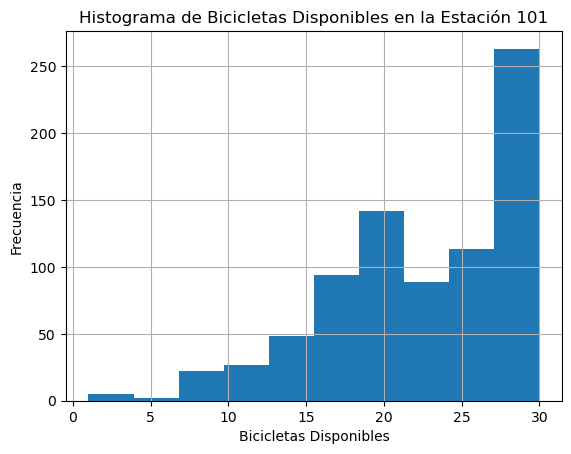

In [15]:
# Your answer here!!!
filtro_df = df[df['number'] == indx_max_prom]    # extraigo las filas correspondientes a la 
                                                # estación con el promedio más alto de bicicletsa disponibles
filtro_df['available'].hist() # creo un histograma

# personalizo el histograma
plt.xlabel('Bicicletas Disponibles')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de Bicicletas Disponibles en la Estación {indx_max_prom}')

plt.show()

In [12]:
display(filtro_df)

,number,total,updated,available
236,101,30,2023-05-04 16:20:06,13
433,101,30,2023-05-04 16:29:13,15
708,101,30,2023-05-04 16:39:47,16
1072,101,30,2023-05-04 16:49:55,15
1269,101,30,2023-05-04 17:00:06,16
...,...,...,...,...
221044,101,30,2023-05-10 11:59:34,2
221142,101,30,2023-05-10 12:59:27,1
221521,101,30,2023-05-10 13:59:22,3
221776,101,30,2023-05-10 15:00:15,7


## 05
Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_16628\512947183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_df['updated'] = pd.to_datetime(filtro_df['updated']) #cambio el tipo de dato a fecha al campo update


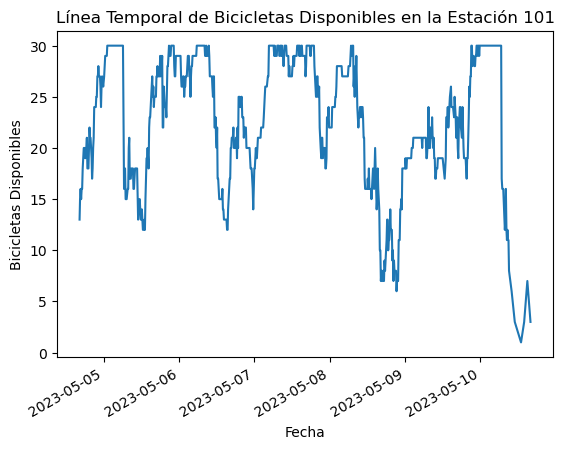

In [16]:
# Your answer here!!!
filtro_df['updated'] = pd.to_datetime(filtro_df['updated']) #cambio el tipo de dato a fecha al campo update
filtro_df.set_index('updated', inplace=True) # selecciono al campo update como índice
filtro_df['available'].plot()

# personalizo la gráfica
plt.xlabel('Fecha')
plt.ylabel('Bicicletas Disponibles')
plt.title(f'Línea Temporal de Bicicletas Disponibles en la Estación {indx_max_prom}')

plt.show()
